In [143]:
from __future__ import division
import os
from matplotlib.backends.backend_pdf import PdfPages

import re
import itertools
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
folder_directory =os.getcwd()
os.chdir(folder_directory)
exec(open('./functions/python_libraries.py').read())
exec(open('./functions/LINK_revised.py').read())
np.seterr(divide='ignore', invalid='ignore')
from sklearn.ensemble import BaggingClassifier # needed for logforest

import imblearn
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler

## Within-Network

In [144]:
df_FB = pd.read_csv('NEWAmherstResultsICWSMRevision.csv')
df_FB['perc_init_labeled'] = np.array([0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 0.95])

In [145]:
df_RM = pd.read_csv('NEWRMesultsICWSMRevision.csv')
df_RM['perc_init_labeled'] = np.array([0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 0.95])

In [146]:
df_Copenhagen = pd.read_csv('NEWCopenhagenResultsICWSMRevision.csv')
df_Copenhagen['perc_init_labeled'] = np.array([0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 0.95])

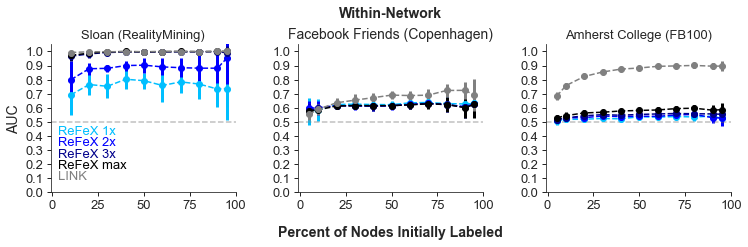

In [147]:
%matplotlib inline
f, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=False,
                            figsize=(10.5, 4))
plt.setp(ax1, xticks=[0,25,50,75,100])


ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax1.errorbar(df_RM.perc_init_labeled*100, df_RM.mean_wt_auc_x1_lbfgs,
            yerr=df_RM.se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')

ax1.errorbar(df_RM.perc_init_labeled*100, df_RM.mean_wt_auc_x2_lbfgs,
    yerr=df_RM.se_wt_auc_x2, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='blue')
ax1.errorbar(df_RM.perc_init_labeled*100, df_RM.mean_wt_auc_x3_lbfgs,
    yerr=df_RM.se_wt_auc_x3, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='darkblue')
ax1.errorbar(df_RM.perc_init_labeled*100, df_RM.mean_wt_auc_xall_lbfgs,
    yerr=df_RM.se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(df_RM.perc_init_labeled*100, df_RM.mean_wt_LINK_RM,
    yerr=df_RM.se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')


ax1.annotate('ReFeX 1x', xy=(3, 0.41), 
         color='deepskyblue', alpha=1, size=13)
ax1.annotate('ReFeX 2x', xy=(3, 0.33), 
         color='blue', alpha=1, size=13)
ax1.annotate('ReFeX 3x', xy=(3, 0.25), 
         color='darkblue', alpha=1, size=13)
ax1.annotate('ReFeX max', xy=(3, 0.17), 
         color='black', alpha=1, size=13)
ax1.annotate('LINK', xy=(3, 0.09), 
         color='gray', alpha=1, size=13)
#ax1.annotate('node2vec', xy=(3, 0.15), 
#         color='red', alpha=1, size=10)


## UPDATE HERE
#ax.set_xticklabels(x_ticks, rotation=0, fontsize=8)
#ax.set_yticklabels(y_ticks, rotation=0, fontsize=8)


ax1.set_ylabel('AUC', size=14)
#ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)


#ax1.set_xlim(-1,np.max(np.array(range(len(acc_generic)))*w)+1)
ax1.set_ylim(0,1.05)
ax1.set_yticks(np.arange(0,1.02,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
ax1.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

ax1.set_title('Sloan (RealityMining)',fontsize=13)




plt.setp(ax2, xticks=[0,25,50,75,100])
ax2.set_xticks([0,25,50,75,100])
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax2.errorbar(df_Copenhagen.perc_init_labeled*100, df_Copenhagen.mean_wt_auc_x1_lbfgs,
            yerr=df_Copenhagen.se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')

ax2.errorbar(df_Copenhagen.perc_init_labeled*100, df_Copenhagen.mean_wt_auc_x2_lbfgs,
    yerr=df_Copenhagen.se_wt_auc_x2, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='blue')
ax2.errorbar(df_Copenhagen.perc_init_labeled*100, df_Copenhagen.mean_wt_auc_x3_lbfgs,
    yerr=df_Copenhagen.se_wt_auc_x3, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='darkblue')
ax2.errorbar(df_Copenhagen.perc_init_labeled*100, df_Copenhagen.mean_wt_auc_xall_lbfgs,
    yerr=df_Copenhagen.se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax2.errorbar(df_Copenhagen.perc_init_labeled*100, df_Copenhagen.mean_wt_LINK_RM,
    yerr=df_Copenhagen.se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')



#ax2.set_ylabel('AUC', size=13)
#ax2.set_xlabel('Percent of Nodes Initially Labeled', size=14)
ax2.set_ylim(0,1.05)
ax2.set_yticks(np.arange(0,1.02,0.1))
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_xlim(-1,100)
ax2.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

ax2.set_title('Facebook Friends (Copenhagen)',fontsize=14)




plt.setp(ax3, xticks=[0,25,50,75,100])


ax3.set_xticks([0,25,50,75,100])
ax3.minorticks_on()
ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax3.errorbar(df_FB.perc_init_labeled*100, df_FB.mean_wt_auc_x1_lbfgs,
            yerr=df_FB.se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')

ax3.errorbar(df_FB.perc_init_labeled*100, df_FB.mean_wt_auc_x2_lbfgs,
    yerr=df_FB.se_wt_auc_x2, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='blue')
ax3.errorbar(df_FB.perc_init_labeled*100, df_FB.mean_wt_auc_x3_lbfgs,
    yerr=df_FB.se_wt_auc_x3, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='darkblue')
ax3.errorbar(df_FB.perc_init_labeled*100, df_FB.mean_wt_auc_xall_lbfgs,
    yerr=df_FB.se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax3.errorbar(df_FB.perc_init_labeled*100, df_FB.mean_wt_LINK_RM,
    yerr=df_FB.se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')
ax3.set_ylim(0,1.05)
ax3.set_yticks(np.arange(0,1.02,0.1))
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.set_xlim(-1,100)
ax3.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

ax3.set_title('Amherst College (FB100)',fontsize=13)

ax2.text(0.5,1.18, "Within-Network", size=14, ha="center", 
         transform=ax2.transAxes, weight = 'bold')


#plt.show()
ax2.text(0.5,-0.3, "Percent of Nodes Initially Labeled", size=14, ha="center", 
         transform=ax2.transAxes, weight = 'bold')
plt.tight_layout()

pp = PdfPages('../../figs/ICWSM_Revise2020/WithinNW_final_1_x_3.pdf')
pp.savefig()
pp.close()


## Across-Layer and Across-Network

In [136]:
df_Copen_across = pd.read_csv('NEWCopenhagenAcrossResultsICWSMRevision.csv')

In [137]:
df_Copen_across.head()

,test,refex-1,refex-2,refex-3,refex-max,auc_LINK
0,calls,0.549817,0.568675,0.584537,0.588190,0.731983
1,bluetooth,0.527033,0.515135,0.502528,0.519404,0.638331
2,SMS,0.586038,0.601569,0.618316,0.620823,0.765818


In [138]:
df_RM_across = pd.read_csv('NEWRMAcrossResultsICWSMRevision.csv')
df_RM_across.head()

,auc_LINK,refex-1,refex-2,refex-3,refex-max,test
0,0.959034,0.851891,0.910714,0.925420,0.917017,Jul-04
1,0.928571,0.861722,0.764652,0.526557,0.858059,Aug-04
2,0.998526,0.908254,0.881356,0.997789,1.000000,Sep-04
3,1.000000,0.925937,1.000000,1.000000,1.000000,Oct-04
4,0.999385,0.880923,0.987077,0.995692,0.997538,Nov-04


In [139]:
df_FB = pd.read_csv('NEWFBAcrossResultsICWSMRevision.csv')

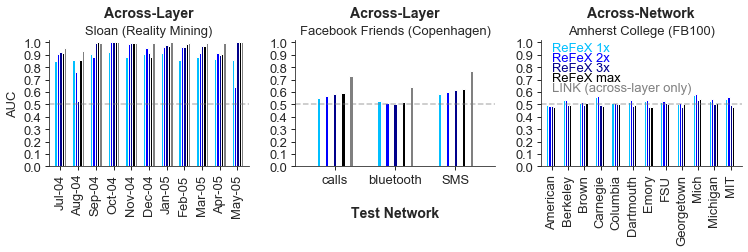

In [140]:
%matplotlib inline
f, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                             sharey=False, sharex=False,
                            figsize=(10.5, 4))

test_type_names = np.array(df_Copen_across.test)

alpha_empirical = 0.4
plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ], 
         xticklabels=df_RM_across.test)
plt.setp(ax1.get_xticklabels(), rotation=90,
        size =13)

#ax1.set_xticks([0,0.25, 0.5, 0.75, 1])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)
ax1.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
ax1.set_ylabel('AUC', size = 13)

w = 1.5
width = 0.2


ax1.bar(np.array(range(len(df_RM_across['refex-1'])))*w-0.4,df_RM_across['refex-1'], color = 'deepskyblue',# alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(df_RM_across['refex-2'])))*w-0.2,df_RM_across['refex-2'], color = 'blue', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(df_RM_across['refex-3'])))*w-0,df_RM_across['refex-3'], color = 'darkblue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(df_RM_across['refex-max'])))*w+0.2,df_RM_across['refex-max'], color = 'black', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')


ax1.bar(np.array(range(len(df_RM_across['auc_LINK'])))*w+0.4,df_RM_across['auc_LINK'], color = 'gray', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')

ax1.set_xlim(-1,np.max(np.array(range(len(df_RM_across.test)))*w)+1)

ax1.set_ylim(0.25,1.02)

ax1.set_yticks(np.arange(0,1.02,0.1))#, size = 13)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


ax1.set_title('Sloan (Reality Mining)', size = 13)




test_type_names = np.array(df_Copen_across.test)

alpha_empirical = 0.4
plt.setp(ax2, xticks=[ 0. ,  1.5,  3. ,  4.5], 
         xticklabels=test_type_names)
plt.setp(ax2.get_xticklabels(), #rotation=90, 
         size = 13)
ax2.minorticks_on()
ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,labelsize = 13)
ax2.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)
w = 1.5
width = 0.08


ax2.bar(np.array(range(len(df_Copen_across['refex-1'])))*w-0.4,df_Copen_across['refex-1'], color = 'deepskyblue',# alpha = 0.5,
       width = width, edgecolor = 'white')

ax2.bar(np.array(range(len(df_Copen_across['refex-2'])))*w-0.2,df_Copen_across['refex-2'], color = 'blue', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')

ax2.bar(np.array(range(len(df_Copen_across['refex-3'])))*w-0,df_Copen_across['refex-3'], color = 'darkblue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax2.bar(np.array(range(len(df_Copen_across['refex-max'])))*w+0.2,df_Copen_across['refex-max'], color = 'black', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')


ax2.bar(np.array(range(len(df_Copen_across['auc_LINK'])))*w+0.4,df_Copen_across['auc_LINK'], color = 'gray', #alpha = 0.5,
       # align = 'center',
       width = width, edgecolor = 'white')

#ax2.set_ylabel('AUC', size=13)
#ax2.set_xlabel('Test Network', size=13)

ax2.set_xlim(-1,np.max(np.array(range(len(df_Copen_across['auc_LINK'])))*w)+1)

ax2.set_ylim(0.25,1.02)

ax2.set_yticks(np.arange(0,1.02,0.1))#, size = 13)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)


ax2.text(0.5,1.18, "Across-Layer", size=14, ha="center", 
         transform=ax2.transAxes, weight = 'bold')

ax1.text(0.5,1.18, "Across-Layer", size=14, ha="center", 
         transform=ax1.transAxes, weight = 'bold')

ax2.set_title('Facebook Friends (Copenhagen)', size = 13)


plt.setp(ax3, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15., 16.5, 18], 
         xticklabels=df_FB.test)#subset_schools_new)
plt.setp(ax3.get_xticklabels(), 
         rotation=90, size = 13)


ax3.minorticks_on()
ax3.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0,labelsize = 13)
ax3.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

w = 1.5
width = 0.2

ax3.bar(np.array(range(len(df_FB['refex-1'])))*w-0.4,df_FB['refex-1'], color = 'deepskyblue',# alpha = 0.5,
       width = width, edgecolor = 'white')

ax3.bar(np.array(range(len(df_FB['refex-2'])))*w-0.2,df_FB['refex-2'], color = 'blue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax3.bar(np.array(range(len(df_FB['refex-3'])))*w-0,df_FB['refex-3'], color = 'darkblue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax3.bar(np.array(range(len(df_FB['refex-max'])))*w+0.2,df_FB['refex-max'], color = 'black', #alpha = 0.5,
       width = width, edgecolor = 'white')
#ax3.set_ylabel('AUC', size=13)

ax3.set_ylim(0,1.02)
ax3.set_yticks(np.arange(0,1.02,0.1))#, size = 13)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.set_xlim(-1,17.5)
#ax1.set_title(train_school)


ax3.text(0.5,1.18, "Across-Network", size=14, ha="center", 
         transform=ax3.transAxes, weight = 'bold')
ax3.set_title('Amherst College (FB100)', size = 13)


ax3.annotate('ReFeX 1x', xy=(0, 0.93), 
         color='deepskyblue', alpha=1, size=13)
ax3.annotate('ReFeX 2x', xy=(0, 0.85), 
         color='blue', alpha=1, size=13)
ax3.annotate('ReFeX 3x', xy=(0, 0.77), 
         color='darkblue', alpha=1, size=13)
ax3.annotate('ReFeX max', xy=(0, 0.69), 
         color='black', alpha=1, size=13)
ax3.annotate('LINK (across-layer only)', xy=(0, 0.61), 
         color='gray', alpha=1, size=13)

ax2.text(0.5,-0.4, "Test Network", size=14, ha="center", 
         transform=ax2.transAxes, weight = 'bold')

plt.tight_layout()


pp = PdfPages('../../figs/ICWSM_Revise2020/Across_final_1_x_3.pdf')
pp.savefig()
pp.close()


In [141]:
df_FB.head()

,refex-1,refex-2,refex-3,refex-max,test
0,0.493976,0.490546,0.488465,0.476833,American
1,0.533997,0.533566,0.495661,0.496735,Berkeley
2,0.509166,0.520740,0.496885,0.507701,Brown
3,0.558756,0.569248,0.493826,0.487382,Carnegie
4,0.513176,0.514029,0.500764,0.505459,Columbia
